# Data Process and Visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, ttest_ind
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/content/crime_vs_socioeconomic_factors.csv')
df.head()

,Region,Crime_Rate,Education_Level,Employment_Rate,Median_Income,Poverty_Rate,Population_Density
0,Region_1,1176,76.492001,73.315344,116664,14.655300,1523
1,Region_2,910,85.361505,46.088096,21401,19.712623,3293
2,Region_3,1344,88.388975,63.911701,105179,9.634319,4528
3,Region_4,1180,54.364509,65.305378,35193,19.994283,2231
4,Region_5,1145,75.305198,51.627568,112389,26.537843,1499


In [3]:
if 'Unemployment_Rate' not in df.columns and 'Employment_Rate' in df.columns:
    df['Unemployment_Rate'] = 100 - df['Employment_Rate']

In [4]:
df['Income_to_Poverty_Ratio'] = df['Median_Income'] / df['Poverty_Rate']
features = [
    'Crime_Rate',
    'Education_Level',
    'Unemployment_Rate',
    'Median_Income',
    'Poverty_Rate',
    'Income_to_Poverty_Ratio'
]
data = df[features].copy()

In [5]:
#log transformation
data['Log_Crime_Rate'] = np.log(data['Crime_Rate'] + 1)

In [6]:
desc_stats = data.describe().T
desc_stats['median'] = data.median()
desc_stats['mode'] = data.mode().iloc[0]
print("Descriptive Statistics:")
display(desc_stats)

Descriptive Statistics:


,count,mean,std,min,25%,50%,75%,max,median,mode
Crime_Rate,1000.0,802.428000,418.186261,50.000000,452.750000,818.500000,1159.000000,1495.000000,818.500000,1172.000000
Education_Level,1000.0,75.391052,14.120708,50.011876,63.229627,76.140098,87.409706,99.967675,76.140098,50.011876
Unemployment_Rate,1000.0,35.179120,14.652422,10.014310,22.518910,34.965399,48.368900,59.990580,34.965399,10.014310
Median_Income,1000.0,69427.926000,29219.031581,20112.000000,44347.000000,67484.000000,96258.250000,119977.000000,67484.000000,21920.000000
Poverty_Rate,1000.0,17.465860,7.226494,5.004663,11.237297,17.550832,23.859603,29.940571,17.550832,5.004663
Income_to_Poverty_Ratio,1000.0,5035.650226,3642.186538,713.155144,2432.851953,3973.093825,6530.232608,22244.728509,3973.093825,713.155144
Log_Crime_Rate,1000.0,6.469734,0.773958,3.931826,6.117546,6.708694,7.056175,7.310550,6.708694,7.067320


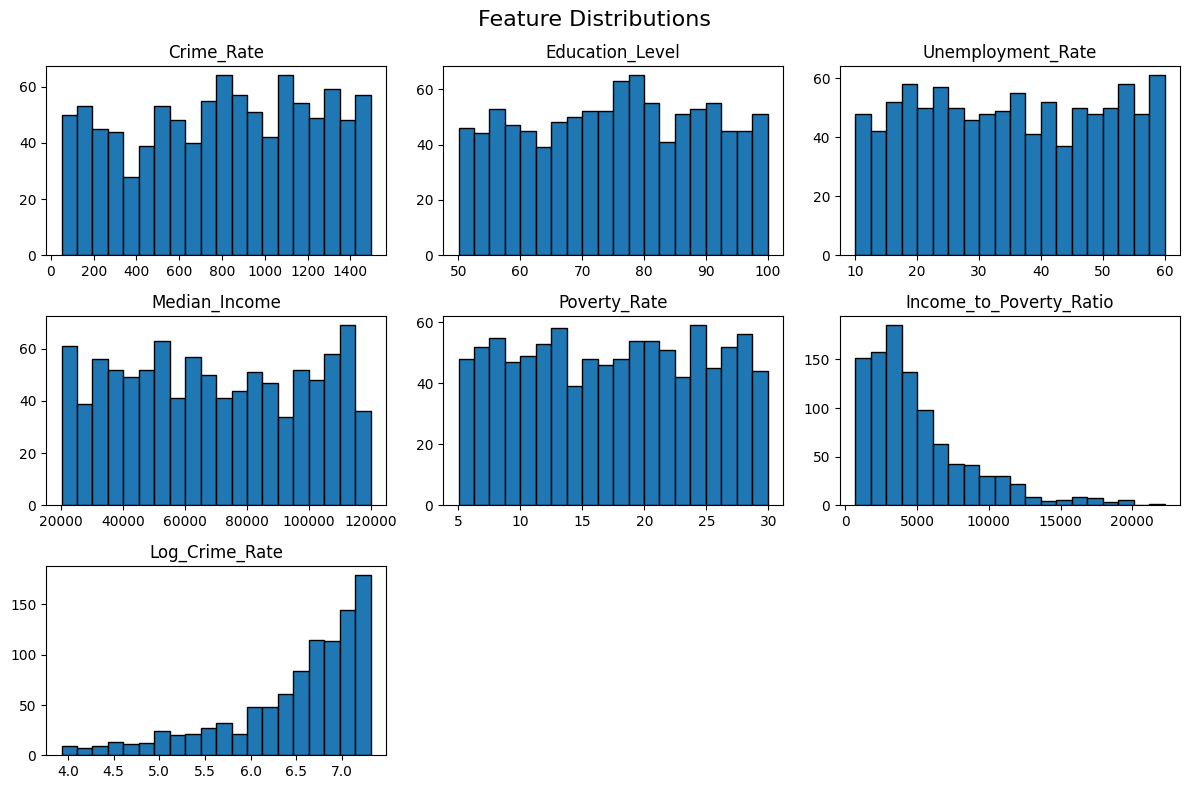

In [23]:
axes = data.hist(bins=20, figsize=(12, 8), edgecolor='black')
for ax in axes.flatten():
    ax.grid(False)
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

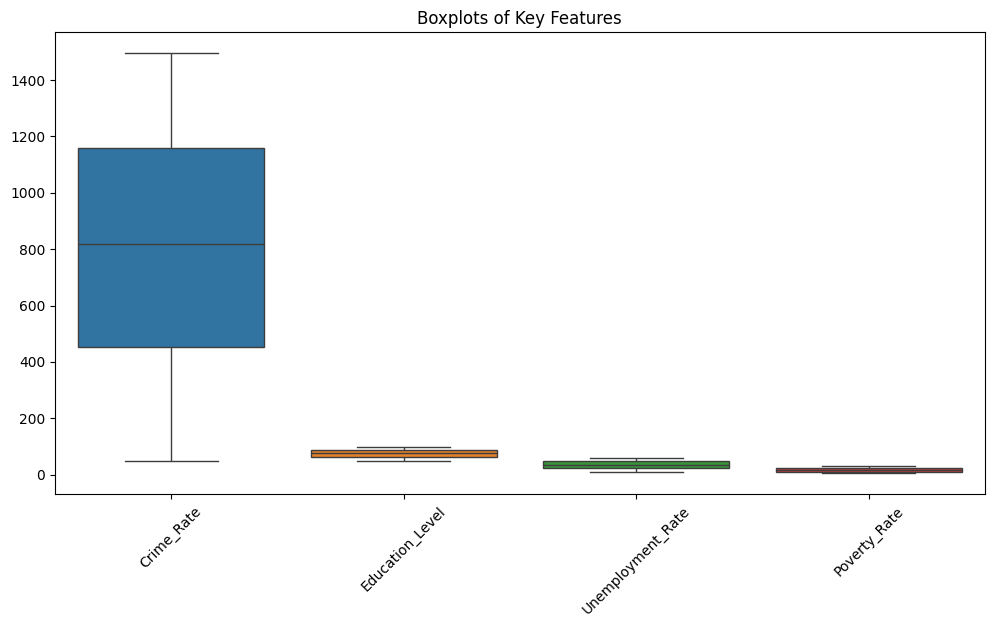

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['Crime_Rate', 'Education_Level', 'Unemployment_Rate', 'Poverty_Rate']])
plt.title("Boxplots of Key Features")
plt.xticks(rotation=45)
plt.show()

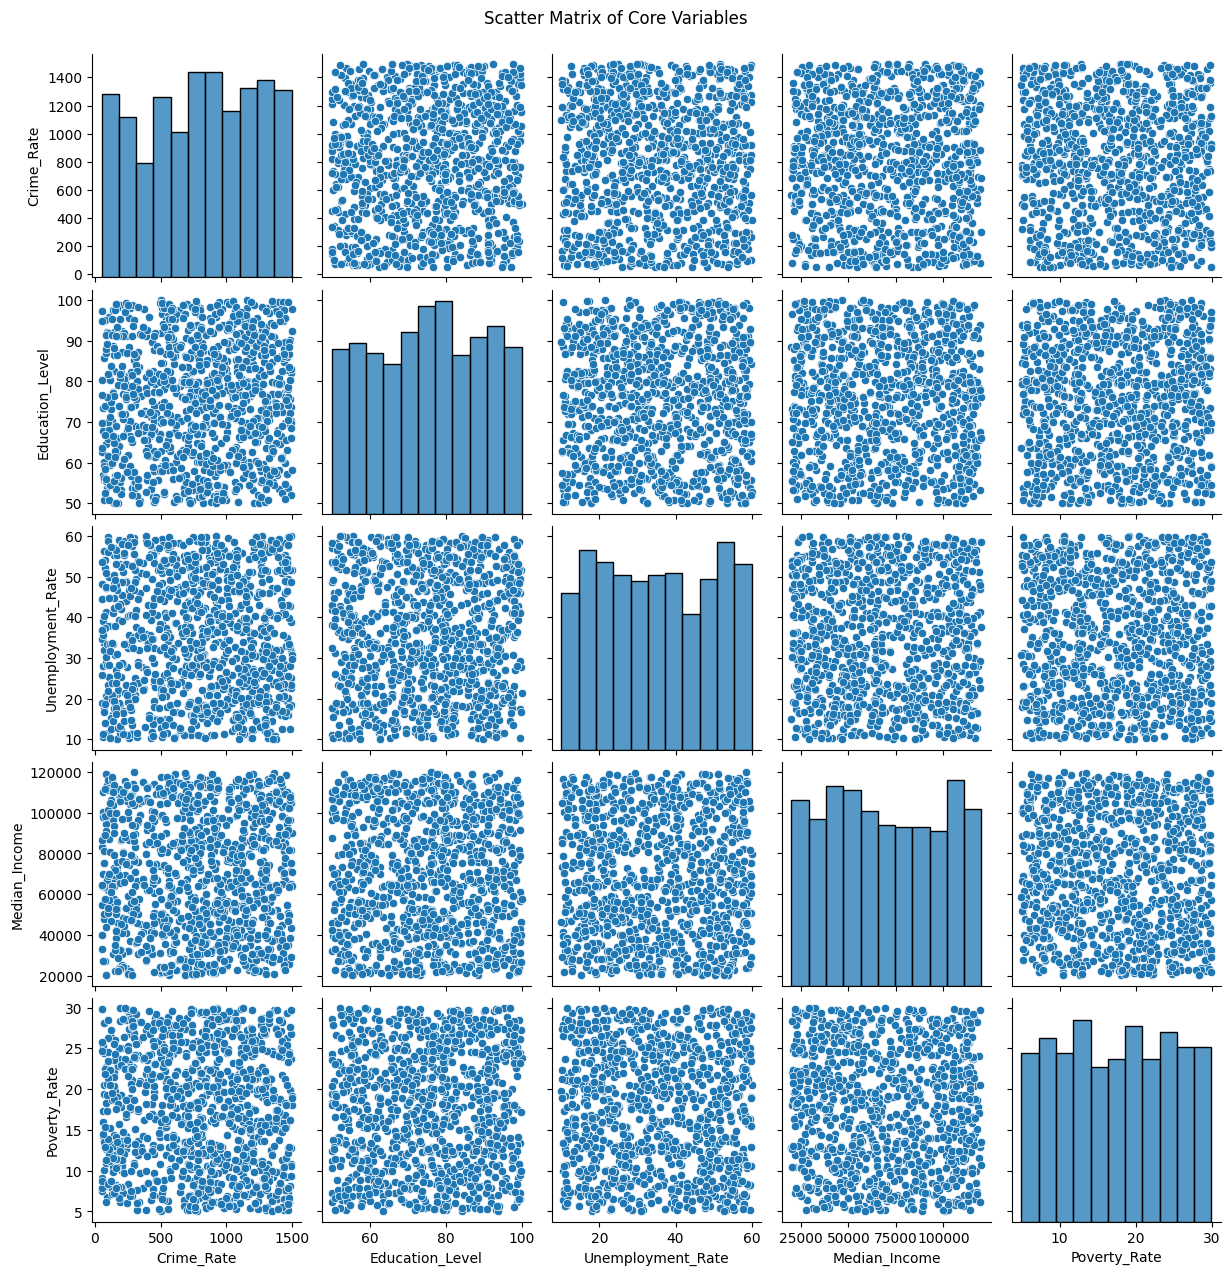

In [9]:
sns.pairplot(data[['Crime_Rate', 'Education_Level', 'Unemployment_Rate', 'Median_Income', 'Poverty_Rate']])
plt.suptitle("Scatter Matrix of Core Variables", y=1.02)
plt.show()

# Hypothesis Tests

In [10]:
corr, p_val = pearsonr(data['Median_Income'], data['Crime_Rate'])
print(f"Pearson Correlation (Income vs Crime): {corr:.2f}, p-value: {p_val:.4f}")
print("Significant" if p_val < 0.05 else "Not significant")

Pearson Correlation (Income vs Crime): 0.01, p-value: 0.8067
Not significant


In [11]:
corr, p_val = pearsonr(data['Education_Level'], data['Crime_Rate'])
print(f"Pearson Correlation (Education vs Crime): {corr:.2f}, p-value: {p_val:.4f}")
print("Significant" if p_val < 0.05 else "Not significant")

Pearson Correlation (Education vs Crime): 0.06, p-value: 0.0565
Not significant


In [12]:
threshold = data['Poverty_Rate'].median()
high_poverty = data[data['Poverty_Rate'] >= threshold]['Crime_Rate']
low_poverty = data[data['Poverty_Rate'] < threshold]['Crime_Rate']
t_stat, p_val = ttest_ind(high_poverty, low_poverty)
print(f"T-statistic: {t_stat:.2f}, p-value: {p_val:.4f}")
print("Significant difference between high and low poverty regions" if p_val < 0.05 else "No significant difference")

T-statistic: -1.41, p-value: 0.1597
No significant difference


# Additional analysis for research questions

In [13]:
corr, p_val = pearsonr(data['Unemployment_Rate'], data['Crime_Rate'])
print(f'Unemployment vs Crime: Correlation = {corr:.2f}, p = {p_val:.4f}')

Unemployment vs Crime: Correlation = -0.00, p = 0.8923


In [14]:
df['Unemployment_Rate'] = 100 - df['Employment_Rate']
df['Income_to_Poverty_Ratio'] = df['Median_Income'] / df['Poverty_Rate']
df['Poverty_Density'] = df['Poverty_Rate'] * df['Population_Density']

In [15]:
import statsmodels.api as sm
X = df[['Education_Level', 'Employment_Rate', 'Median_Income', 'Poverty_Rate', 'Population_Density', 'Poverty_Density']]
y = df['Crime_Rate']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Crime_Rate   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.341
Date:                Thu, 24 Apr 2025   Prob (F-statistic):              0.236
Time:                        15:13:35   Log-Likelihood:                -7450.3
No. Observations:                1000   AIC:                         1.491e+04
Df Residuals:                     993   BIC:                         1.495e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                775.0210    118

## Visualization for Crime Rate vs Socioeconomic Features

Regression plots for each variable

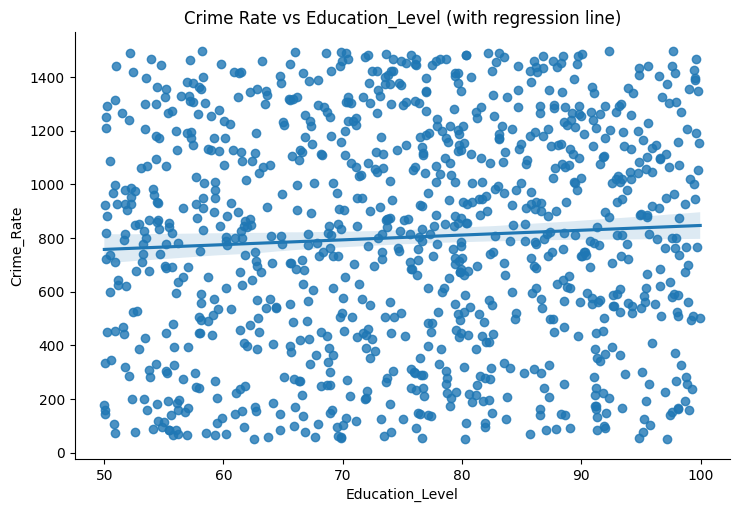

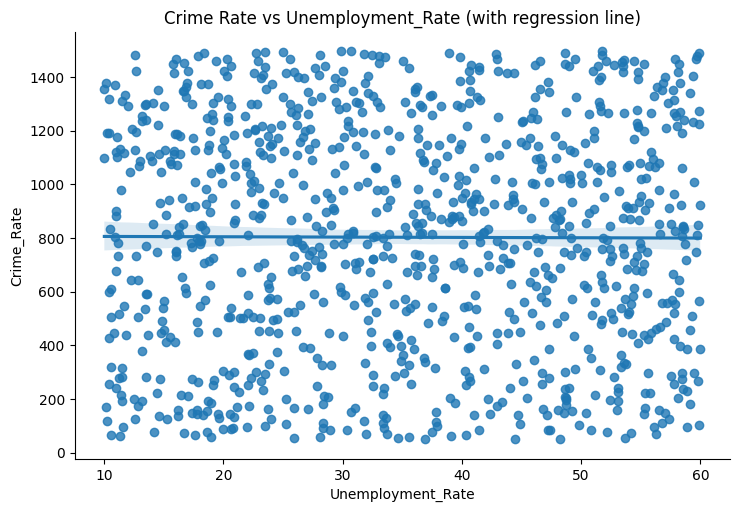

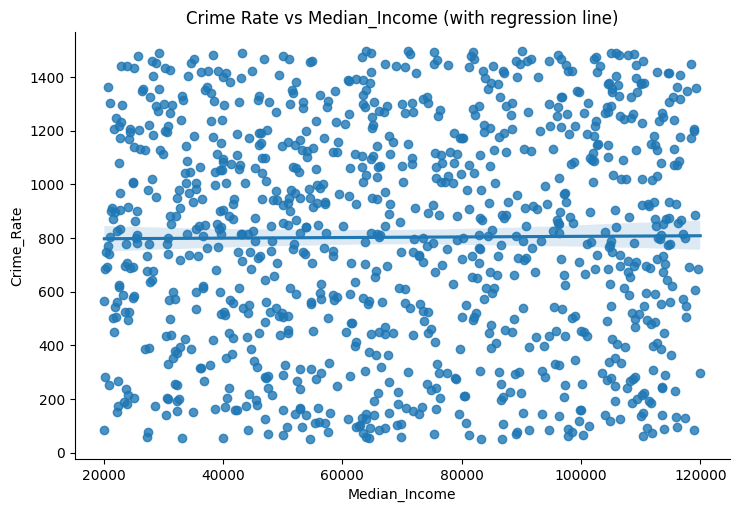

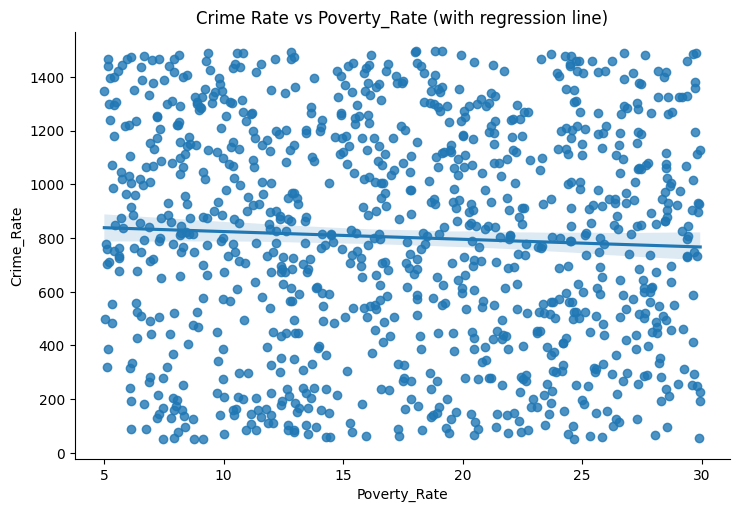

In [16]:
features = ['Education_Level', 'Unemployment_Rate', 'Median_Income', 'Poverty_Rate']
for feature in features:
    sns.lmplot(data=data, x=feature, y='Crime_Rate', height=5, aspect=1.5)
    plt.title(f"Crime Rate vs {feature} (with regression line)")
    plt.show()

Scatter + regression with customization

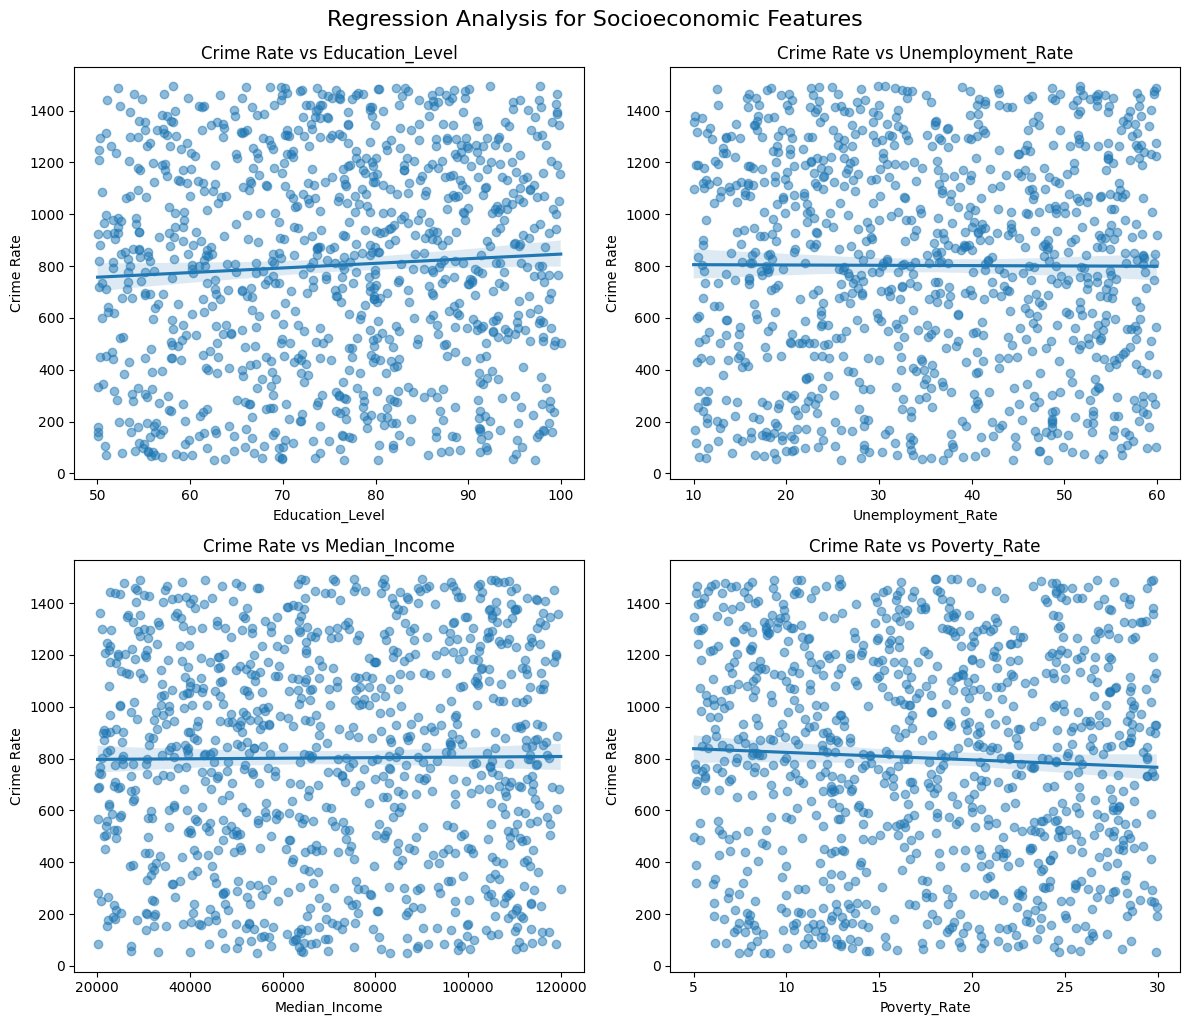

In [17]:
plt.figure(figsize=(12, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.regplot(data=data, x=feature, y='Crime_Rate', scatter_kws={'alpha': 0.5})
    plt.title(f"Crime Rate vs {feature}")
    plt.xlabel(feature)
    plt.ylabel("Crime Rate")
plt.tight_layout()
plt.suptitle("Regression Analysis for Socioeconomic Features", fontsize=16, y=1.02)
plt.show()

Crime rate by education level groups

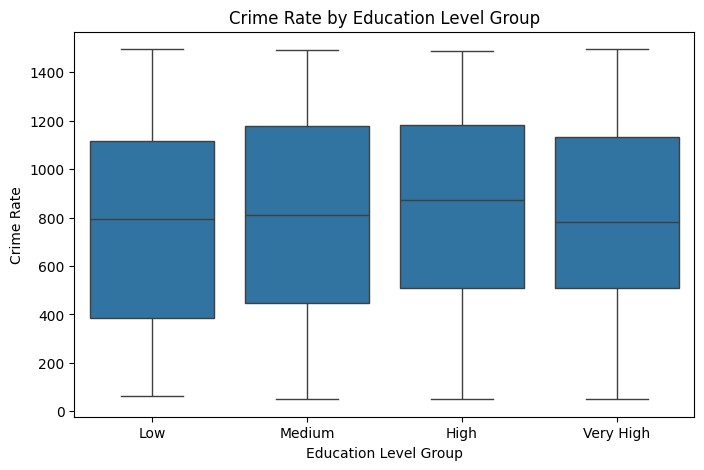

In [18]:
data['Edu_Level_Group'] = pd.cut(data['Education_Level'], bins=[0, 60, 75, 90, 100], labels=['Low', 'Medium', 'High', 'Very High'])
plt.figure(figsize=(8, 5))
sns.boxplot(x='Edu_Level_Group', y='Crime_Rate', data=data)
plt.title("Crime Rate by Education Level Group")
plt.xlabel("Education Level Group")
plt.ylabel("Crime Rate")
plt.show()

Correlation heatmap

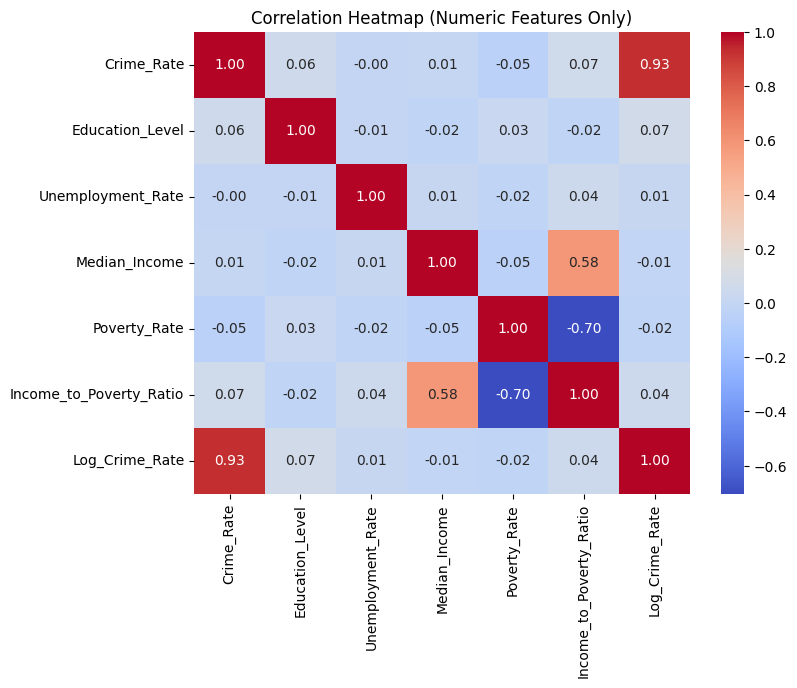

In [19]:
numeric_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

Histograms with scatter overlay

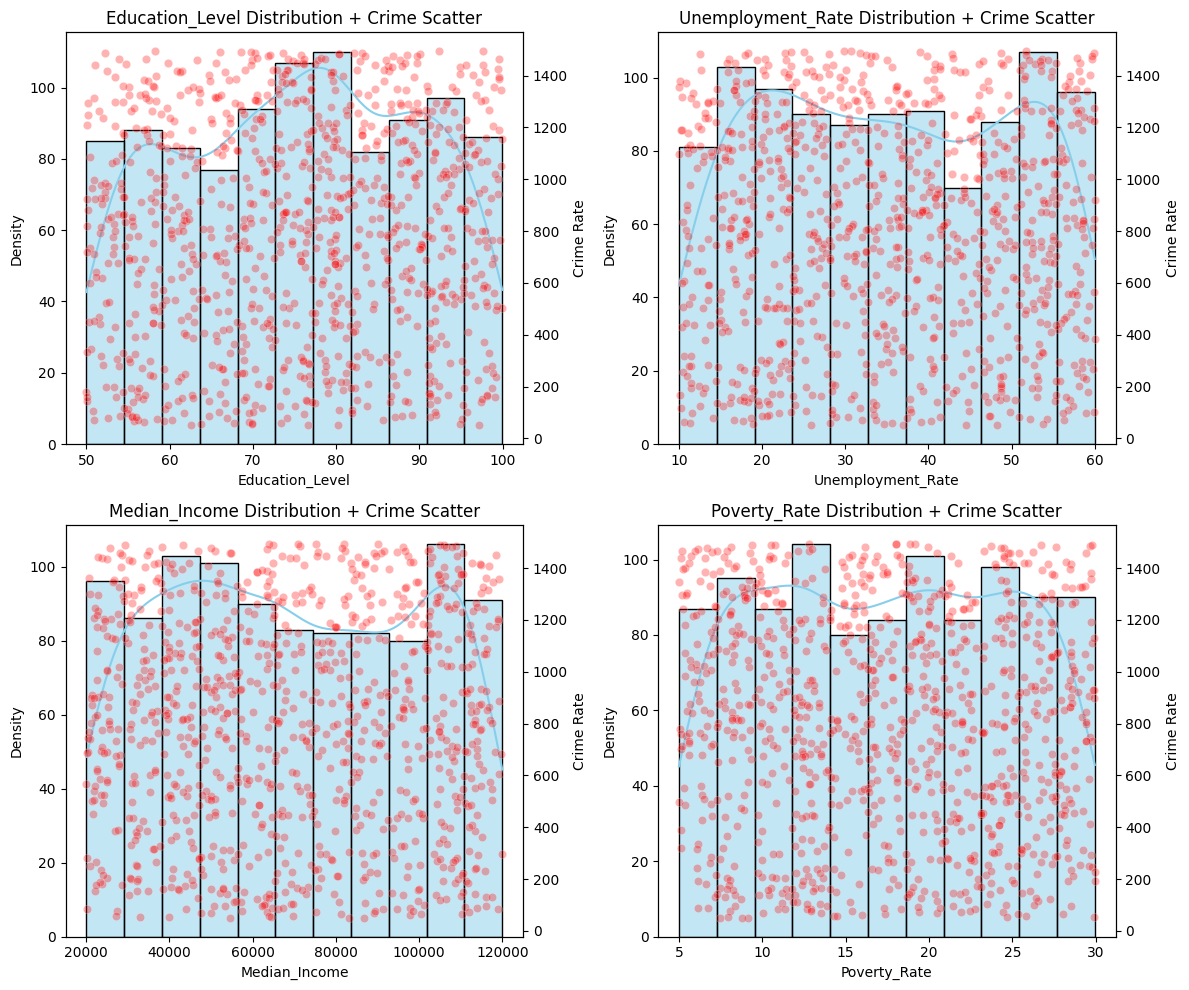

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for ax, feature in zip(axes.flatten(), features):
    sns.histplot(data[feature], ax=ax, kde=True, color='skyblue')
    ax2 = ax.twinx()
    sns.scatterplot(x=data[feature], y=data['Crime_Rate'], ax=ax2, color='red', alpha=0.3)
    ax.set_title(f"{feature} Distribution + Crime Scatter")
    ax.set_xlabel(feature)
    ax.set_ylabel("Density")
    ax2.set_ylabel("Crime Rate")
plt.tight_layout()
plt.show()